In [1]:
import pandas as pd
import numpy as np            
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart-disease.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.shape

(303, 14)

### Attribute Information:
Only 14 attributes used:
- Age
- Sex
- CP, Chest pain
- restbp, resting blood pressure(in mm Hg)
- chol, serum cholesterol in mg/dl
- fbs, fasting blood sugar
- restecg, resting electrocardiographic results
- thalach, maximum heart rate achieved
- exang, exercise induced angina
- oldpeak, ST depression induced by exercise relative to rest
- slope, the slope of the peak exercise ST segment
- ca, number of major vessels (0-3) colored by fluoroscopy
- thal, this is short of thalium heart scan.
- hd, diagnosis of heart disease, the predicted attribute

In [5]:
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [6]:
df.columns=['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [8]:
df.hd.value_counts()

hd
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

In [11]:
df[df.age>61]['hd'].value_counts(normalize=True)

hd
0    0.478873
2    0.154930
1    0.154930
3    0.140845
4    0.070423
Name: proportion, dtype: float64

In [12]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,hd
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [13]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('No. of unique features = ',df[i].nunique())
    print()

age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
No. of unique features =  41

sex
[1. 0.]
No. of unique features =  2

cp
[1. 4. 3. 2.]
No. of unique features =  4

restbp
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
No. of unique features =  50

chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303

In [14]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [15]:
df['ca'] = df['ca'].replace('?',df['ca'].mode()[0]).astype(float)
df['thal'] = df['thal'].replace('?',df['thal'].mode()[0]).astype(float)

In [16]:
print(df.ca.unique())
print(df.thal.unique())

[0. 3. 2. 1.]
[6. 3. 7.]


In [17]:
new_df = df.copy(deep = True)

## Data Information
age:- Float
sex:- category
0 = female
1 = male
cp:- chest pain, category
1 = typical angina
2 = atypical angina
3 = non-anginal pain
4 = asymptomatic
restbp, resting blood pressure(in mm hg), Float
chol, serum cholesterol in mg/dl, Float
fbs, fasting blood sugar, Category
0 = >=120 mpg/dl
1 = <=120 mpg/dl
restecg, resting electrocardiographic results, Category
1 = normal
2 = having ST-T wave abnormality
3 = showing probable or definite left ventricular hypertropy
thalach, maximum heart rate achieved, Float
exang, exercise induced angina, Category
0 = no
1 = yes
oldpeak, ST depression induced by exercise relative to rest. Float
slope, the slope of the peak exercise ST segment, Category
1 = unsloping
2 = flat
3 = downsloping
ca, number of major vessels (0-3) colored by fluoroscopy, Float
thal, thalium heart scan, Category
3 = normal (no cold spots)
6 = fixed defect(cold spots during rest and exercise)
7 = reversible defect(when cold spots only appear during exercise)

In [18]:
X=new_df.drop('hd',axis=1)
y = new_df['hd']

In [19]:
y.unique()

array([0, 2, 1, 3, 4])

In [22]:
y.value_counts(normalize=True)*100

hd
0    54.125413
1    18.151815
2    11.881188
3    11.551155
4     4.290429
Name: proportion, dtype: float64

In [23]:
y_non_zero_index = y>0
y[y_non_zero_index]=1
y.unique()

array([0, 1])

In [26]:
y.value_counts(normalize=True)*100

hd
0    54.125413
1    45.874587
Name: proportion, dtype: float64

## Model -1 preliminary

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

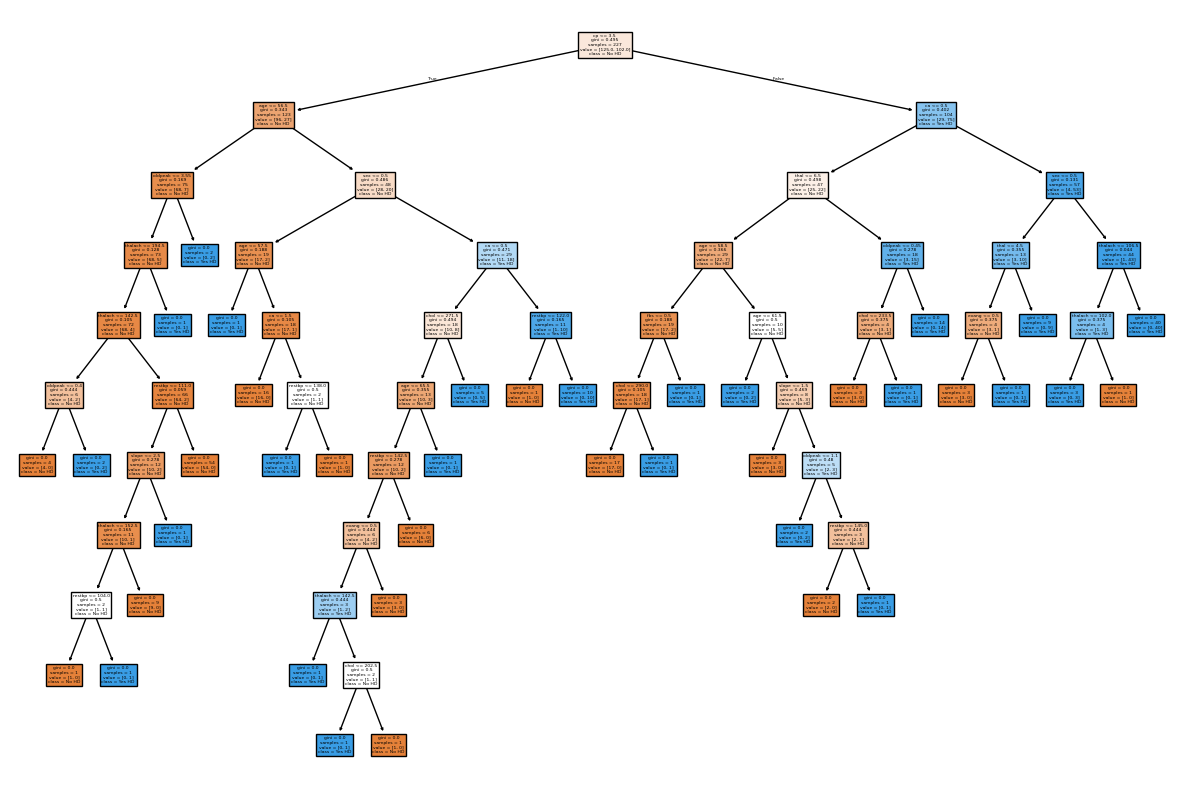

In [39]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model1,filled=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()

In [46]:
predictions = model1.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        39
           1       0.63      0.70      0.67        37

    accuracy                           0.66        76
   macro avg       0.66      0.66      0.66        76
weighted avg       0.66      0.66      0.66        76



## pre-prune

In [40]:
model2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

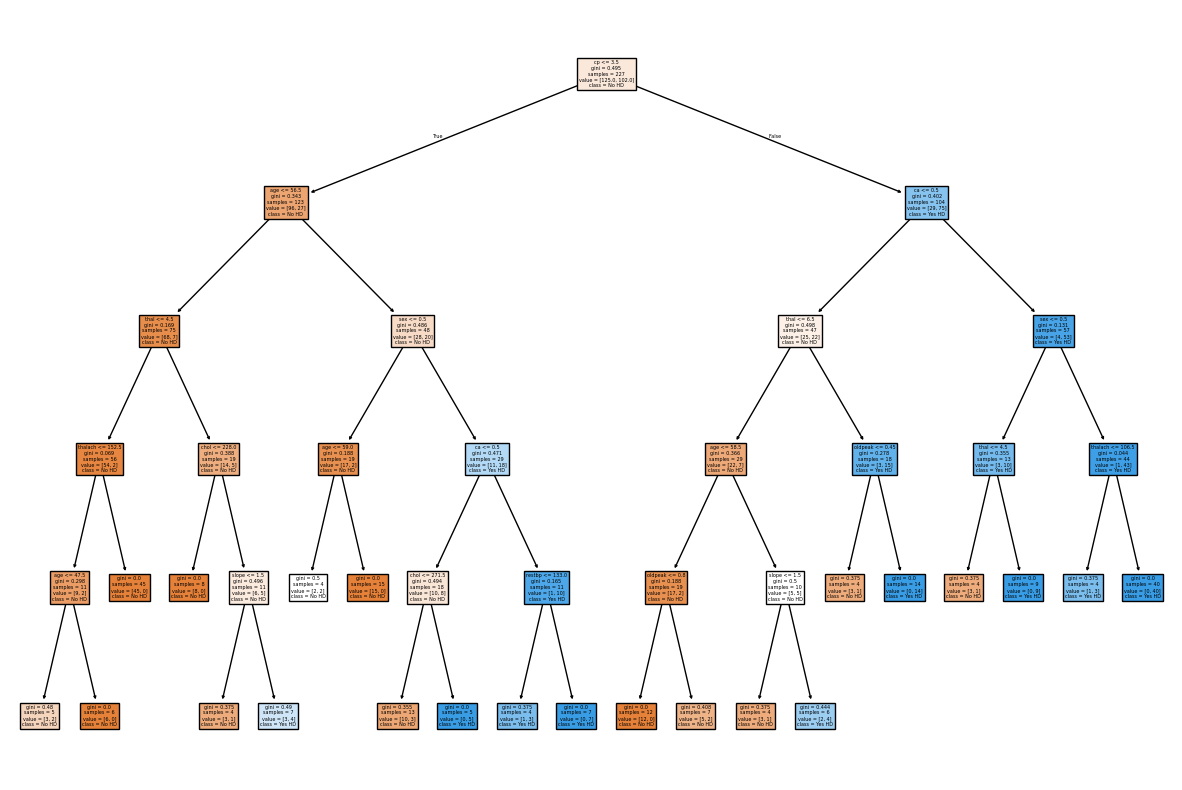

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(model2,filled=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()

In [47]:
predictions = model2.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.85      0.79        39
           1       0.81      0.68      0.74        37

    accuracy                           0.76        76
   macro avg       0.77      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76

